In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузите файл с компьютера
uploaded = files.upload()
df = pd.read_csv('sep.csv')
df.head()

Saving sep.csv to sep.csv


,№,Канал,Траты всего,Доходы всего,ROMI,Валовая Прибыль,Спенд,Расходники,Коммисия,Цена за подписчика,Конверсия горячая,Сотрудник
0,NaN,Итого,97 566,78 960,"46,90%",-18 606,89 236,283,8 047,"3,11","0,91%",NaN
1,1.0,Э33БДЖ,68,71,"5,00%",3,62,0,"5,59","8,46","2,38%",Вова
2,2.0,КР19БСОФ,360,70,"-80,60%",-290,330,0,"29,74","5,07","2,38%",Анатолий
3,3.0,КР11БА,2 912,3 275,"12,50%",363,2 599,65,"248,11","5,88","1,64%",Максим
4,4.0,А7БДЖ,15 692,11 844,"-24,50%",-3 848,14 324,0,"1 368,43","4,62","1,55%",Анатолий


# Проверка данных и предобработка

In [3]:
df.columns

Index(['№', 'Канал', 'Траты всего', 'Доходы всего', 'ROMI', 'Валовая Прибыль',
       'Спенд', 'Расходники', 'Коммисия', 'Цена за подписчика',
       'Конверсия горячая', 'Сотрудник'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   №                   34 non-null     float64
 1   Канал               35 non-null     object 
 2   Траты всего         35 non-null     object 
 3   Доходы всего        35 non-null     object 
 4   ROMI                35 non-null     object 
 5   Валовая Прибыль     35 non-null     object 
 6   Спенд               35 non-null     object 
 7   Расходники          35 non-null     object 
 8   Коммисия            35 non-null     object 
 9   Цена за подписчика  35 non-null     object 
 10  Конверсия горячая   35 non-null     object 
 11  Сотрудник           34 non-null     object 
dtypes: float64(1), object(11)
memory usage: 3.4+ KB


In [5]:
# Преобразуем данные, убирая пробелы, запятые и проценты
df['Траты всего'] = df['Траты всего'].replace({'\s': '', ',': ''}, regex=True).astype(float)
df['Доходы всего'] = df['Доходы всего'].replace({'\s': '', ',': ''}, regex=True).astype(float)
df['ROMI'] = df['ROMI'].replace({',': '.', '%': ''}, regex=True).astype(float)
df['Валовая Прибыль'] = df['Валовая Прибыль'].replace({',': '.', '\s': ''}, regex=True).astype(float)
df['Спенд'] = df['Спенд'].replace({',': '.', '\s': ''}, regex=True).astype(float)
df['Расходники'] = df['Расходники'].replace({',': '.', '\s': ''}, regex=True).astype(float)
df['Коммисия'] = df['Коммисия'].replace({',': '.', '\s': ''}, regex=True).astype(float)
df['Цена за подписчика'] = df['Цена за подписчика'].replace({',': '.', '\s': ''}, regex=True).astype(float)
df['Конверсия горячая'] = df['Конверсия горячая'].replace({',': '.', '%': ''}, regex=True).astype(float)

# Удаляем строку "Итого", если она есть
df = df.dropna(subset=['№'])

# Проверка обработанных данных
df.head()

,№,Канал,Траты всего,Доходы всего,ROMI,Валовая Прибыль,Спенд,Расходники,Коммисия,Цена за подписчика,Конверсия горячая,Сотрудник
1,1.0,Э33БДЖ,68.0,71.0,5.0,3.0,62.0,0.0,5.59,8.46,2.38,Вова
2,2.0,КР19БСОФ,360.0,70.0,-80.6,-290.0,330.0,0.0,29.74,5.07,2.38,Анатолий
3,3.0,КР11БА,2912.0,3275.0,12.5,363.0,2599.0,65.0,248.11,5.88,1.64,Максим
4,4.0,А7БДЖ,15692.0,11844.0,-24.5,-3848.0,14324.0,0.0,1368.43,4.62,1.55,Анатолий
5,5.0,А10БЭМ,658.0,55.0,-91.6,-603.0,608.0,0.0,49.74,0.00,1.54,Ростик


In [6]:
# Преобразуем данные, убирая пробелы, запятые и проценты
df['Траты всего'] = df['Траты всего'].replace({'\s': '', ',': ''}, regex=True).astype(float)
df['Доходы всего'] = df['Доходы всего'].replace({'\s': '', ',': ''}, regex=True).astype(float)
df['ROMI'] = df['ROMI'].replace({'%': ''}, regex=True).astype(float)
df['Валовая Прибыль'] = df['Валовая Прибыль'].replace({'\s': '', ',': ''}, regex=True).astype(float)
df['Спенд'] = df['Спенд'].replace({'\s': '', ',': ''}, regex=True).astype(float)
df['Конверсия горячая'] = df['Конверсия горячая'].replace({'%': ''}, regex=True).astype(float)

# Удаляем строку "Итого", если она есть
df = df.dropna(subset=['№'])

In [7]:
# Загрузите файл с компьютера
uploaded = files.upload()
df_1 = pd.read_csv('zal.csv')

# Просмотр первых 5 строк
df_1.head()

Saving zal.csv to zal.csv


,Дата,Валовая Прибыль,ROMI,Траты всего,Спенд,Комиссия агенства,Расходники,CPA,Показы,Клики,...,Click,Reg,FTD,FTD когорты,Цена FTD когорты,RD,Горячие FTD,Конверсия горячая,Цена за горячий,Конверт (деп/диа)
0,01.04.2024,0,"0,00%",0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,"0,00%",0,"0,00%"
1,02.04.2024,0,"0,00%",0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,"0,00%",0,"0,00%"
2,03.04.2024,0,"0,00%",0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,"0,00%",0,"0,00%"
3,04.04.2024,0,"0,00%",0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,"0,00%",0,"0,00%"
4,05.04.2024,0,"0,00%",0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,"0,00%",0,"0,00%"


In [8]:
df_1.columns

Index(['Дата', 'Валовая Прибыль', 'ROMI', 'Траты всего', 'Спенд',
       'Комиссия агенства', 'Расходники', 'CPA', 'Показы', 'Клики',
       'Конверсии', 'Цена клика', 'Цена за конверсию', 'CTR, %', 'CPM,',
       'Конверсия лендинга, %', 'Подписчики', 'Цена за подписчика', 'Диалогов',
       '% диалогов', 'Click', 'Reg', 'FTD', 'FTD когорты', 'Цена FTD когорты',
       'RD', 'Горячие FTD', 'Конверсия горячая', 'Цена за горячий',
       'Конверт (деп/диа)'],
      dtype='object')

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Дата                   104 non-null    object 
 1   Валовая Прибыль        104 non-null    int64  
 2   ROMI                   104 non-null    object 
 3   Траты всего            104 non-null    object 
 4   Спенд                  104 non-null    object 
 5   Комиссия агенства      104 non-null    object 
 6   Расходники             104 non-null    object 
 7   CPA                    104 non-null    object 
 8   Показы                 104 non-null    object 
 9   Клики                  104 non-null    object 
 10  Конверсии              104 non-null    object 
 11  Цена клика             104 non-null    object 
 12  Цена за конверсию      104 non-null    object 
 13  CTR, %                 104 non-null    object 
 14  CPM,                   104 non-null    object 
 15  Конвер

In [10]:
# Преобразование данных в df
numeric_columns = ['Траты всего', 'Доходы всего', 'ROMI', 'Валовая Прибыль', 'Спенд']
for column in numeric_columns:
    df[column] = pd.to_numeric(
        df[column].astype(str).str.replace(',', '').str.replace('\xa0', '').str.strip(),
        errors='coerce'
    )

# Преобразование данных в df_1
df_1['Траты всего'] = pd.to_numeric(df_1['Траты всего'].replace({',': '', '\xa0': ''}, regex=True), errors='coerce')
df_1['Цена за подписчика'] = pd.to_numeric(df_1['Цена за подписчика'].replace({',': '', '\xa0': ''}, regex=True), errors='coerce')

In [11]:
# Статистические характеристики
print(df.describe(include='all'))  # Включает все столбцы
print(df_1.describe(include='all'))

                №   Канал   Траты всего  Доходы всего         ROMI  \
count   34.000000      34     34.000000     34.000000    34.000000   
unique        NaN      34           NaN           NaN          NaN   
top           NaN  Э33БДЖ           NaN           NaN          NaN   
freq          NaN       1           NaN           NaN          NaN   
mean    17.500000     NaN   2747.617647   2277.735294    13.664706   
std      9.958246     NaN   3996.507172   4209.900951   315.422294   
min      1.000000     NaN     60.000000     31.000000   -96.700000   
25%      9.250000     NaN    698.500000    171.000000   -68.900000   
50%     17.500000     NaN   1131.000000    803.000000   -38.000000   
75%     25.750000     NaN   3352.250000   1805.750000    -3.375000   
max     34.000000     NaN  15991.000000  19199.000000  1785.800000   

        Валовая Прибыль         Спенд  Расходники     Коммисия  \
count         34.000000     34.000000   34.000000    34.000000   
unique              NaN    

# 1. Рейтинг баеров за сентябрь


Задачи:
- определить какие сотрудники работают наиболее эффективно, а какие менее эффективно
- проанализировать взаимосвязь между показателями. Если ли тенденции?
- на основе данного анализа предложить 1-3 рекомендации для улучшения производительности компании
-  построить графики, иллюстрирующие ваши выводы и показывающие те или иные закономерности. Отчет должен быть оформлен так, чтобы его мог понять менеджер, не обладающий техническими знаниями

Ожидаемый результат:

Подробный отчет в формате презентации, описание работы, визуализации, выводы и рекомендации

In [12]:
# Анализ эффективности сотрудников
efficiency = df.groupby('Сотрудник').agg({'Доходы всего': 'sum', 'Траты всего': 'sum'})
efficiency['ROMI'] = efficiency['Доходы всего'] / efficiency['Траты всего']
efficiency = efficiency.sort_values(by='ROMI', ascending=False)
efficiency

,Доходы всего,Траты всего,ROMI
Сотрудник,,,
Альберт,1130.0,60.0,18.833333
Саша,31998.0,27567.0,1.160736
Ростик,4755.0,4187.0,1.135658
Вова,71.0,68.0,1.044118
Максим,6034.0,7267.0,0.830329
Александр,5269.0,6758.0,0.779669
Кристина,1255.0,1701.0,0.737801
Анатолий,11974.0,16514.0,0.725082
Максим 2,3595.0,5056.0,0.711036


<ipython-input-13-296b3a94488c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=efficiency.index, y='ROMI', data=efficiency, palette='viridis')


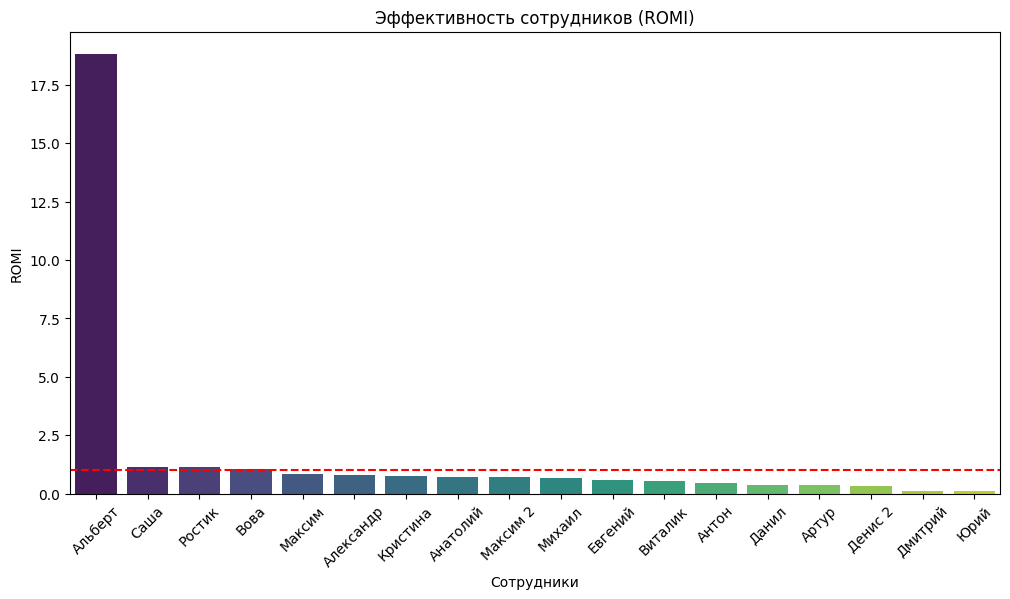

In [13]:
# Настройка графика
plt.figure(figsize=(12, 6))
sns.barplot(x=efficiency.index, y='ROMI', data=efficiency, palette='viridis')
plt.title('Эффективность сотрудников (ROMI)')
plt.xlabel('Сотрудники')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.axhline(1, color='red', linestyle='--')  # Линия на уровне 1 для визуализации
plt.show()

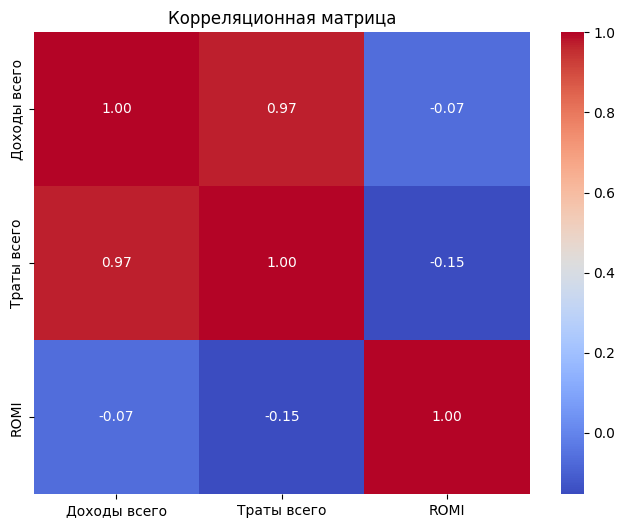

In [14]:
# Корреляционная матрица
correlation = efficiency[['Доходы всего', 'Траты всего', 'ROMI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [15]:
correlation

,Доходы всего,Траты всего,ROMI
Доходы всего,1.000000,0.970779,-0.066072
Траты всего,0.970779,1.000000,-0.153129
ROMI,-0.066072,-0.153129,1.000000


Корреляционная матрица показывает взаимосвязь между доходами, тратами и ROMI.

**Анализ корреляционной матрицы**

**Доходы всего и Траты всего:**

Корреляция: 0.97
Интерпретация: Очень высокая положительная корреляция. Это означает, что с увеличением трат обычно увеличиваются и доходы. Это ожидаемо, так как инвестиции в рекламу и маркетинг часто приводят к росту доходов.


**Доходы всего и ROMI:**

Корреляция: -0.066
Интерпретация: Практически отсутствует корреляция. Это может указывать на то, что увеличение доходов не всегда связано с увеличением ROMI, что подчеркивает важность контроля за расходами.


**Траты всего и ROMI:**

Корреляция: -0.153
Интерпретация: Слабая отрицательная корреляция. Это может означать, что высокие траты не всегда приводят к высокому ROMI, что указывает на возможные неэффективные расходы.




**Рекомендации на основе анализа**

Оптимизация расходов: Проанализируйте, как распределяются расходы среди сотрудников, и попытайтесь найти неэффективные расходы, которые не приводят к росту доходов.

Сфокусируйтесь на стратегиях повышения ROMI: Например, изучите, какие каналы работают лучше всего для сотрудников с высоким ROMI, и постарайтесь применить эти стратегии к другим.

Отслеживание результатов: Установите метрики для мониторинга эффективности рекламы и расходов, чтобы иметь возможность быстро реагировать на изменения.

# Доходы и расходы

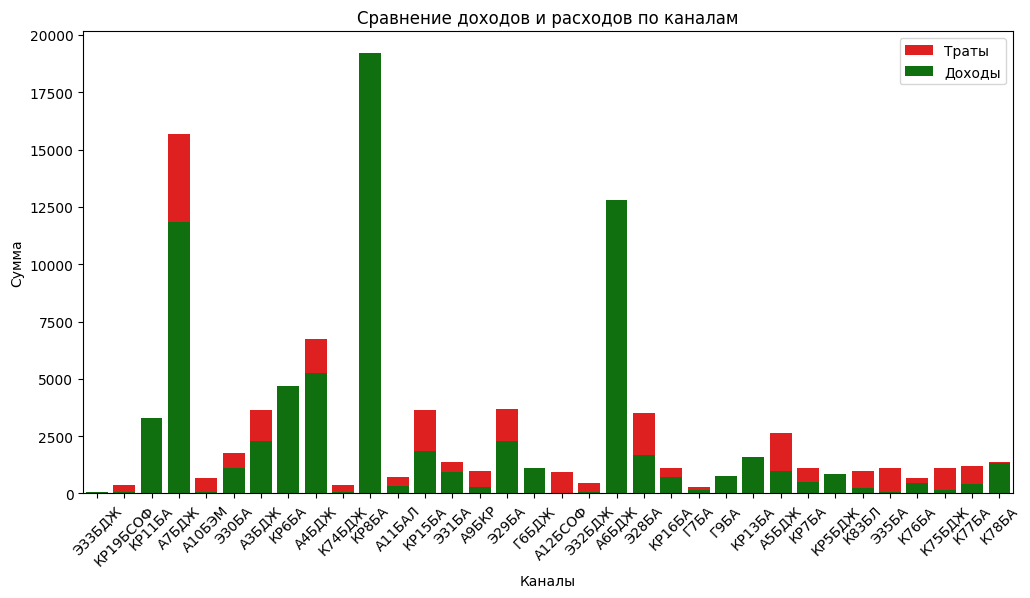

In [16]:
# Визуализация доходов и расходов
plt.figure(figsize=(12, 6))
sns.barplot(x='Канал', y='Траты всего', data=df, color='red', label='Траты')
sns.barplot(x='Канал', y='Доходы всего', data=df, color='green', label='Доходы')
plt.title('Сравнение доходов и расходов по каналам')
plt.xlabel('Каналы')
plt.ylabel('Сумма')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Основные каналы с высоким доходом: На графике видно, что некоторые каналы имеют значительно более высокие доходы по сравнению с другими. Например, каналы K143ЖХ, K486ЖХ и K318ЖХ имеют наибольшие зеленые столбцы (доходы), что указывает на высокую прибыльность этих каналов.

Каналы с большими расходами: Некоторые каналы показывают значительные расходы (красные столбцы), которые иногда приближаются или превышают доходы. Например, Каналы K395СОО и А15ДАХ имеют заметные расходы, причем у K395СОО расходы составляют значительную долю по отношению к доходу.

Каналы с низким доходом и расходом: У ряда каналов, таких как A105ЭМ, 33БЖХ и K315BA, как доходы, так и расходы минимальны, что указывает на их низкую активность или малую значимость в общем объеме операций.

Баланс доходов и расходов: В большинстве каналов доходы превышают расходы, что является положительным показателем. Однако некоторые каналы, такие как K395СОО и K315BA, показывают высокие расходы по сравнению с доходами, что может требовать пересмотра стратегии работы с ними.

Неравномерность распределения доходов: Каналы с большими доходами выделяются на фоне остальных, у которых доходы значительно ниже. Это может говорить о зависимости от нескольких ключевых каналов и о необходимости диверсификации.

График зависимости Траты всего от Валовая Прибыль

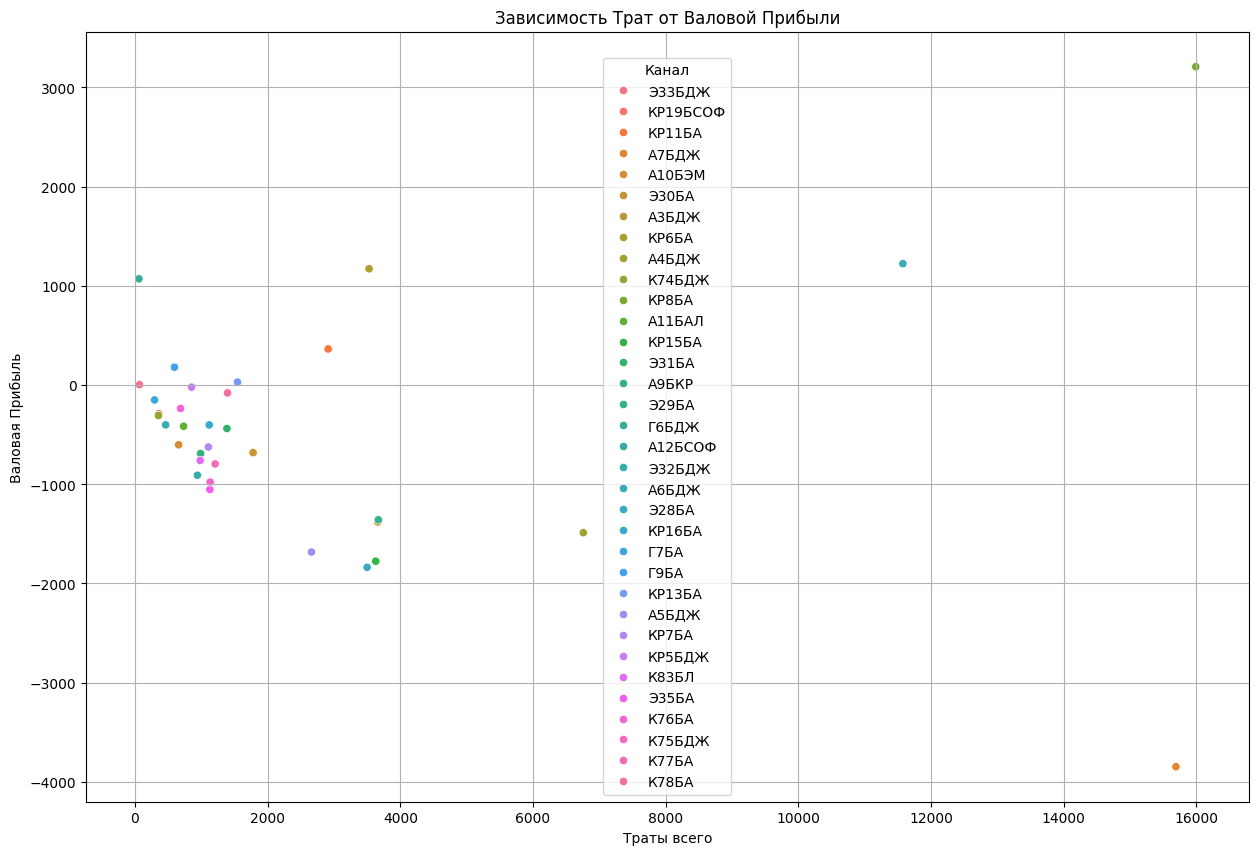

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Траты всего', y='Валовая Прибыль', hue='Канал')
plt.title('Зависимость Трат от Валовой Прибыли')
plt.xlabel('Траты всего')
plt.ylabel('Валовая Прибыль')
plt.grid()
plt.show()

Положительная валовая прибыль и низкие затраты: Некоторые каналы, такие как A7БДЖ и KP11BA, имеют положительную валовую прибыль при относительно низких затратах, что указывает на их высокую эффективность.

Отрицательная валовая прибыль и умеренные затраты: Большинство каналов показали отрицательную валовую прибыль при небольших или умеренных затратах, что свидетельствует о недостаточной доходности. Это указывает на необходимость анализа этих каналов и поиска путей снижения затрат или повышения доходности.

Высокие затраты и отрицательная валовая прибыль: Канал с меткой KR76BA показал высокие затраты и значительную отрицательную валовую прибыль. Этот канал может быть особенно неэффективным и требовать пересмотра или оптимизации затрат.

Редкие высокие затраты и положительная прибыль: Есть отдельные каналы с высоким уровнем затрат и положительной прибылью, что может указывать на потенциально прибыльные, но затратные направления, которые можно сделать более эффективными.

Вывод: Анализ показывает необходимость оптимизации каналов с высокой отрицательной валовой прибылью и рассмотрения успешных каналов для возможного увеличения инвестиций.